In [ ]:
!pip install celluloid
# !pip install black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from celluloid import Camera
import random

In [ ]:
def insert_piece(tabuleiro, i, j, value = 1):
  """
  """
  _tabuleiro = tabuleiro.copy()
  _tabuleiro[i][j] = value
  return _tabuleiro

def insert_random_piece(tabuleiro, value = 1):
  return insert_piece(tabuleiro,random.randint(0,7),random.randint(0,7), value = 1)

def get_pieces_positions(tabuleiro):
  x, y = np.where(tabuleiro>=1)
  list_of_positions = [(i,j) for i,j in zip(x,y)]
  return list_of_positions

def knight_moves(chessboard):
  """
  knight moves on continuum topology
  """
  possible_moves = {0: (2,1), 1: (1,2),2: (-2,1), 3: (-1,2), 4: (2,-1), 5: (1,-2),6: (-2,-1), 7: (-1,-2)}
  list_of_positions = get_pieces_positions(chessboard)
  updated_chessboard = np.zeros((8,8))
  for piece_position in list_of_positions:
    current_move = possible_moves[np.random.choice(range(8))]
    new_position = tuple(map(operator.add, current_move, piece_position))
    # continuum and reflections are implied in mod 8 calculation for new position
    new_position_x, new_position_y  = tuple(i%8 for i in new_position)
    updated_chessboard = insert_piece(updated_chessboard,new_position_x,new_position_y, value = 2)
  return (updated_chessboard + chessboard)/2

def knight_moves_limited(chessboard):
  """
  knight moves on limited chessboard topology
  """
  possible_moves = {0: (2,1), 1: (1,2),2: (-2,1), 3: (-1,2), 4: (2,-1), 5: (1,-2),6: (-2,-1), 7: (-1,-2)}
  list_of_positions = get_pieces_positions(chessboard)
  updated_chessboard = np.zeros((8,8))
  for piece_position in list_of_positions:
    rerrun = 1
    while rerrun == 1:
      current_move = possible_moves[np.random.choice(range(8))]
      new_position_x, new_position_y = tuple(map(operator.add, current_move, piece_position))
      if new_position_x < 8 and new_position_y < 8 and new_position_x > -1 and new_position_y > -1:
        rerrun  = 0
      else:
        rerrun = 1
    updated_chessboard = insert_piece(updated_chessboard,new_position_x,new_position_y, value = 2)
  return (updated_chessboard + chessboard)/2

def bishop_moves(chessboard):
  """
  Bishop moves on continuum topology
  """
  possible_moves = {0: (1,1), 1: (1,-1), 2: (-1,1), 3: (-1,-1)}
  list_of_positions = get_pieces_positions(chessboard)
  updated_chessboard = np.zeros((8,8))
  for piece_position in list_of_positions:
    step_size = random.randint(0,8)
    current_move = (step_size*i for i in possible_moves[np.random.choice(range(4))])
    new_position = tuple(map(operator.add, current_move, piece_position))
    # continuum and reflections are implied in mod 8 calculation for new position
    new_position_x, new_position_y  = tuple(i%8 for i in new_position)
    updated_chessboard = insert_piece(updated_chessboard,new_position_x,new_position_y, value = 2)
  return (updated_chessboard + chessboard)/2

def bishop_moves_limited(chessboard):
  """
  bishop moves on limited chessboard topology
  """
  possible_moves = {0: (1,1), 1: (1,-1), 2: (-1,1), 3: (-1,-1)}
  list_of_positions = get_pieces_positions(chessboard)
  updated_chessboard = np.zeros((8,8))
  for piece_position in list_of_positions:
    rerrun = 1
    while rerrun == 1:
      step_size = random.randint(0,8)
      current_move = tuple((step_size*i for i in possible_moves[np.random.choice(range(4))]))
      new_position_x, new_position_y = tuple(map(operator.add, current_move, piece_position))
      if new_position_x < 8 and new_position_y < 8 and new_position_x > -1 and new_position_y > -1:
        rerrun  = 0
      else:
        rerrun = 1
    updated_chessboard = insert_piece(updated_chessboard,new_position_x,new_position_y, value = 2)
  return (updated_chessboard + chessboard)/2

In [ ]:
def get_first_plot(tabuleiro):
  """
  """
  fig = plt.figure()
  plt.imshow(tabuleiro)
  ax = plt.gca()
  ax.set_xticks(np.arange(-.5, 8, 1), minor=True)
  ax.set_yticks(np.arange(-.5, 8, 1), minor=True)
  ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
  return fig

def get_next_plot(tabuleiro):
  """
  """
  plt.imshow(tabuleiro)

def get_knight_shadow_gif(tabuleiro):
  """
  """

  fig = get_first_plot(tabuleiro)
  camera = Camera(fig)

  for i in range(300):
    tabuleiro = knight_moves(tabuleiro)
    get_next_plot( tabuleiro )
    camera.snap()

  animation = camera.animate()
  return animation
  # animation.save("KnightShadowMoves.gif", writer = "pillow")

def get_knight_limited_board_gif(tabuleiro):
  """
  """

  fig = get_first_plot(tabuleiro)
  camera = Camera(fig)

  for i in range(300):
    tabuleiro = knight_moves_limited(tabuleiro)
    get_next_plot( tabuleiro )
    camera.snap()

  animation = camera.animate()
  return animation

def get_bishop_shadow_gif(tabuleiro):
  """
  """

  fig = get_first_plot(tabuleiro)
  camera = Camera(fig)

  for i in range(300):
    tabuleiro = bishop_moves(tabuleiro)
    get_next_plot( tabuleiro )
    camera.snap()

  animation = camera.animate()
  return animation
  # animation.save("KnightShadowMoves.gif", writer = "pillow")

def get_bishop_limited_board_gif(tabuleiro):
  """
  """

  fig = get_first_plot(tabuleiro)
  camera = Camera(fig)

  for i in range(300):
    tabuleiro = bishop_moves_limited(tabuleiro)
    get_next_plot( tabuleiro )
    camera.snap()

  animation = camera.animate()
  return animation
  # animation.save("BishopShadowMoves.gif", writer = "pillow")

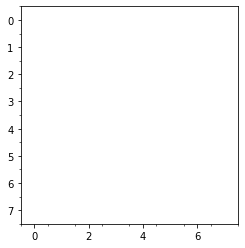

In [ ]:
tabuleiro = np.zeros((8,8))

for i in range(1): tabuleiro = insert_random_piece(tabuleiro, value = 1)

bishop_animation = get_bishop_limited_board_gif(tabuleiro)
bishop_animation.save("BishopChessboardMoves.gif", writer = "pillow")

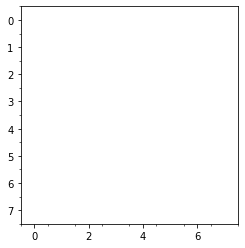

In [ ]:

knight_animation = get_knight_limited_board_gif(tabuleiro)
knight_animation.save("knightChessboardMoves.gif", writer = "pillow")

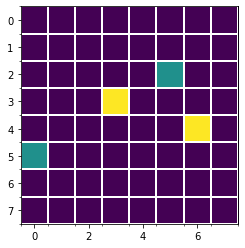

In [ ]:
tabuleiro_ = knight_moves(tabuleiro)
get_plot(tabuleiro/2 + tabuleiro_)

# Nova seção

# Nova seção

In [ ]:
get_pieces_positions(tabuleiro)[0]

(2, 1)

In [ ]:
possible_moves = {0: (2,1), 1: (1,2),2: (-2,1), 3: (-1,2), 4: (2,-1), 5: (1,-2),6: (-2,-1), 7: (-1,-2)}
a = possible_moves[np.random.choice(range(8))]
b = get_pieces_positions(tabuleiro)[0]

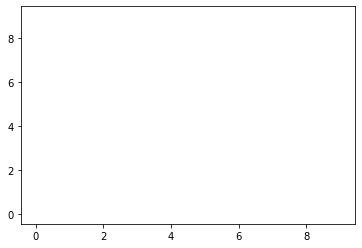

In [ ]:
fig = plt.figure()
camera = Camera(fig)
for i in range(10):
  plt.plot([i] * 10)
  camera.snap()
  animation = camera.animate()